In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
from sklearn.cross_validation import train_test_split

C:\Users\Srini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn import metrics

In [8]:
data=pd.read_csv('kc_house_data.csv')

In [9]:
data_1=data.copy()

In [10]:
data_1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
data_1.drop(['id'],axis=1,inplace=True)

In [15]:
data_1.drop(['zipcode'],axis=1,inplace=True)

In [19]:
data_1.drop(['condition'],axis=1,inplace=True)

In [20]:
data_1.drop(['yr_built'],axis=1,inplace=True)

In [24]:
data_1.drop(['sqft_lot'],axis=1,inplace=True)

In [25]:
data_1.drop(['sqft_lot15'],axis=1,inplace=True)

In [36]:
data_1.drop(['date'],axis=1,inplace=True)

In [37]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
dtypes: float64(5), int64(9)
memory usage: 2.3 MB


In [38]:
data_1.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,84.402258,47.560053,-122.213896,1986.552492
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,401.679240,0.138564,0.140828,685.391304
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,0.000000,47.155900,-122.519000,399.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,0.000000,47.471000,-122.328000,1490.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,0.000000,47.571800,-122.230000,1840.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,0.000000,47.678000,-122.125000,2360.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000


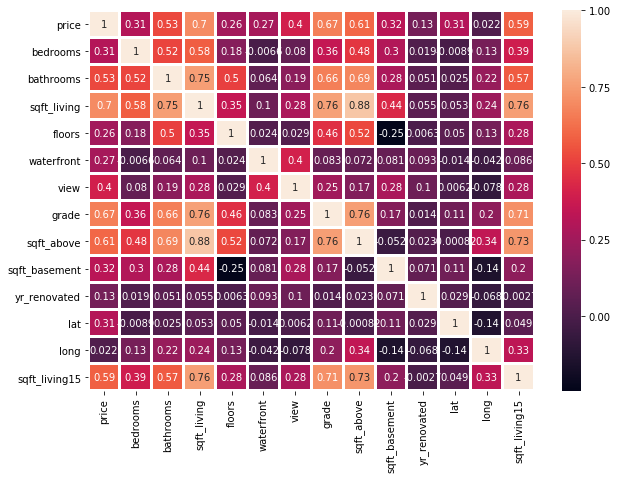

In [39]:
plt.figure(figsize=(10,7))
sb.heatmap(data_1.corr(),annot=True,linewidths=2)

In [40]:
independent=data_1.drop(['price'],axis=1)
dependent=data_1['price']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.3,random_state=145)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15129, 13)
(15129,)
(6484, 13)
(6484,)


In [43]:
lm=LinearRegression()

In [44]:
lm=lm.fit(x_train,y_train)

In [45]:
train_prd=lm.predict(x_train)

In [46]:
test_prd=lm.predict(x_test)

In [47]:
print("Train RMSE:",np.sqrt(metrics.mean_squared_error(y_train,train_prd)))
print("Test RMSE:",np.sqrt(metrics.mean_squared_error(y_test,test_prd)))

Train RMSE: 214512.9308908672
Test RMSE: 202352.97918520542
